# C-More

## Keyword extraction with YAKE

In [1]:
import json
import pandas as pd

import requests
import yake

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#### 1. Load json data into a dataframe

In [2]:
list_json = []

with open('tweet_json_1day.txt') as file:
    for line in file:
        data = json.loads(line)
        list_json.append(data)

df = pd.DataFrame(list_json, columns = ['id', 'text', 'lang', 'created_at', 'public_metrics'])

In [3]:
df.rename(columns={'id': 'ID', 'text': 'Text', 'lang': 'Language', 'created_at': 'Creation Date'}, inplace=True)

In [4]:
df['Retweets'] = df['public_metrics'].apply(lambda x: x['retweet_count'])
df['Replies'] = df['public_metrics'].apply(lambda x: x['reply_count'])
df['Likes'] = df['public_metrics'].apply(lambda x: x['like_count'])
df['Quotes'] = df['public_metrics'].apply(lambda x: x['quote_count'])

In [5]:
df.drop('public_metrics', axis=1, inplace=True)

In [6]:
df

,ID,Text,Language,Creation Date,Retweets,Replies,Likes,Quotes
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21T23:59:32.000Z,0,0,1,0
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0
...,...,...,...,...,...,...,...,...
7148,1539035542632939521,Só um @McDonalds_BR agora me deixaria feliz.,pt,2022-06-21T00:00:41.000Z,0,1,1,0
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,en,2022-06-21T00:00:40.000Z,0,0,1,1
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,en,2022-06-21T00:00:31.000Z,0,1,2,0
7151,1539035475352211456,@McDonalds It's literally raw so I am not sure...,en,2022-06-21T00:00:25.000Z,0,0,0,0


#### 2. Get tweets in english

In [7]:
df[df['Language'] == 'en']['Text']

0       @trashevrythng @hardevrythng @McDonalds and th...
1       @trashevrythng @hardevrythng @McDonalds respec...
2       @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...
4       @auauwra too bad im sending 8 mcdonalds large ...
5       @_idkjia Last time I went to McDonalds.  lol  ...
                              ...                        
7146    if belos comes back we should just give him a ...
7147    we were at mcdonalds and suddenly 4 school bus...
7149    IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...
7150    Tough times @McDonalds inflation is shrinking ...
7151    @McDonalds It's literally raw so I am not sure...
Name: Text, Length: 5377, dtype: object

In [8]:
# list with EN tweets

tweets_en = [tweet for tweet in df[df['Language'] == 'en']['Text']]

#### 3. Add full stop to tweets without final punctuation mark

We want to have a string with all our tweets. For that, we need to make sure that each tweet ends with a punctuation mark so that it is "independent" from the next tweet. This is particularly relevant for the extraction of n-grams for n>1.

In [9]:
end_char = []

for tweet in tweets_en:
    end_char.append(tweet[-1])

In [10]:
count_end_char = {n: end_char.count(n) for n in end_char}

In [11]:
for k, v in sorted(count_end_char.items(),  key=lambda x:x[1], reverse=True):
    print(k, v)

. 840
s 528
e 265
? 245
y 235
! 193
t 160
n 119
l 116
d 105
r 96
g 80
o 75
M 74
h 72
u 64
k 58
p 54
m 53
a 50
S 48
Y 48
E 45
f 45
0 44
j 43
w 43
c 41
4 41
) 40
D 39
L 38
😭 38
N 37
1 35
A 34
🤣 34
😂 34
️ 33
H 32
P 32
R 32
x 31
z 31
3 30
b 30
G 30
C 29
7 29
W 28
V 27
O 26
F 25
5 24
T 24
J 22
i 22
B 21
Q 21
2 21
v 21
K 20
X 20
8 20
9 20
q 19
Z 18
U 18
6 17
" 15
I 14
… 13
” 12
🥺 11
- 11
🤔 10
🥹 9
( 9
😊 8
* 7
😻 7
😆 7
👀 7
😌 7
😩 6
👍 6
🙄 6
🥲 5
😍 5
🏼 5
/ 5
😔 5
🏾 5
🍟 5
🤮 4
🧐 4
🔥 4
🚀 4
🥴 4
🤡 4
😁 4
💫 4
🤤 4
💔 3
🏻 3
😠 3
' 3
💨 3
🚮 3
🥰 3
🤬 3
💀 3
💯 3
😋 3
😞 3
👆 2
🍔 2
🏽 2
😖 2
🙃 2
😎 2
😃 2
🙏 2
😬 2
🥁 2
😑 2
😳 2
😅 2
😀 2
😐 2
; 2
: 2
👎 2
🤯 2
🥵 2
’ 2
, 2
😕 2
🗿 2
_ 2
ㅋ 2
🐮 1
🥛 1
🐍 1
👏 1
🤨 1
🙈 1
👌 1
🤦 1
🚩 1
🤩 1
🥱 1
😉 1
😇 1
а 1
😒 1
💪 1
🙊 1
😹 1
🤭 1
💎 1
} 1
🗣 1
😈 1
🤧 1
🤝 1
😙 1
😣 1
💗 1
^ 1
🎶 1
🥪 1
🌈 1
💬 1
🤠 1
🇽 1
👈 1
📸 1
🫡 1
🍖 1
😤 1
🙂 1
🤗 1
🤐 1
😡 1
🇸 1
+ 1
◨ 1
📩 1
🌙 1
💐 1
% 1
🍦 1
！ 1
😄 1
🤲 1
♡ 1
😧 1
🌱 1
🌚 1
🤑 1
🫠 1
$ 1
😢 1
🤓 1
🥇 1
💖 1
# 1
{ 1
ᵈ 1
👹 1
💱 1


As we can see, most of our tweets do not end with a punctuation mark. We will correct that.

In [12]:
final_punc = ['…', '.', '?', '!']

tweets_en_clean = []

end_char = []

for tweet in tweets_en:
    if tweet[-1] not in final_punc:
        tweet = tweet + '.'
    tweets_en_clean.append(tweet)
        
    end_char.append(tweet[-1])

In [13]:
count_end_char = {n: end_char.count(n) for n in end_char}

for k, v in sorted(count_end_char.items(),  key=lambda x:x[1], reverse=True):
    print(k, v)

. 4926
? 245
! 193
… 13


In [14]:
print(len(tweets_en), len(tweets_en_clean))

5377 5377


All of our tweets now end with a punctuation mark and we can create our string `text`.

In [15]:
text = ' '.join(tweets_en_clean).replace('\n', ' ')

print(text)

@trashevrythng @hardevrythng @McDonalds and the breakfast. @trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga. @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity.   Summing up the first 2 hours:  Colorado Buffaloes 🐃 talk yawn. TopCat bracket filler. No phone calls.  You are all gemstones for reading this thread.  We made it ... together 🤲 ❤️. https://t.co/F8jWl62vYB. @auauwra too bad im sending 8 mcdonalds large fries to u rn. @_idkjia Last time I went to McDonalds.  lol   https://t.co

#### 4. Extract keywords with YAKE API

In [17]:
url_api = "https://tm-websuiteapps.ipt.pt/yake/api/v2.0/extract_keywords"

payload = {'content': text, 'max_ngram_size': 3, 'number_of_keywords': 20}

r = requests.post(url_api, data=payload)

In [18]:
result = r.json()
result

{'keywords': [{'ngram': 'McDonalds', 'score': 6.391729187024043e-06},
  {'ngram': 'MCDONALDS MCDONALDS MCDONALDS', 'score': 3.2016450438789214e-05},
  {'ngram': 'Free McDonald Gift', 'score': 4.7302731015178615e-05},
  {'ngram': 'McDonald Gift Card', 'score': 6.311812123125866e-05},
  {'ngram': 'McDonalds Big mac', 'score': 7.836347721452657e-05},
  {'ngram': 'McDonald', 'score': 8.071794390636215e-05},
  {'ngram': 'McDonalds bring back', 'score': 8.430286397742067e-05},
  {'ngram': 'McDonalds McDonald', 'score': 0.00012591357177182337},
  {'ngram': 'mcdonalds sprite', 'score': 0.00012958535879475827},
  {'ngram': 'McDonalds McDonald burgers', 'score': 0.00016786304127290285},
  {'ngram': 'Big Mac', 'score': 0.00019117867539454367},
  {'ngram': 'Free McDonald', 'score': 0.0001933709136026265},
  {'ngram': 'McDonalds Happy meal', 'score': 0.00019464091890272062},
  {'ngram': 'mcdonalds sprite mcdonalds', 'score': 0.00019867340228531675},
  {'ngram': 'McDonald Russia craves', 'score': 0.

#### 5. Build wordcloud

In [19]:
# for YAKE, the lower the score, the more relevant the keyword is
# we need to reverse the order because for wordcloud, the highest the score, the more relevant the keyword is

keyword_wordcloud = {}
for keyword in result['keywords']:
    if keyword['score'] < 0:
        keyword_wordcloud[keyword['ngram']] = 1 
    else:
        keyword_wordcloud[keyword['ngram']] = 1 - keyword['score']

In [20]:
keyword_wordcloud

{'McDonalds': 0.999993608270813,
 'MCDONALDS MCDONALDS MCDONALDS': 0.9999679835495612,
 'Free McDonald Gift': 0.9999526972689848,
 'McDonald Gift Card': 0.9999368818787687,
 'McDonalds Big mac': 0.9999216365227854,
 'McDonald': 0.9999192820560936,
 'McDonalds bring back': 0.9999156971360226,
 'McDonalds McDonald': 0.9998740864282282,
 'mcdonalds sprite': 0.9998704146412053,
 'McDonalds McDonald burgers': 0.9998321369587271,
 'Big Mac': 0.9998088213246055,
 'Free McDonald': 0.9998066290863974,
 'McDonalds Happy meal': 0.9998053590810972,
 'mcdonalds sprite mcdonalds': 0.9998013265977147,
 'McDonald Russia craves': 0.9997552221057919,
 'McDonald Russia': 0.9997304760639443,
 'McDonald Gift': 0.9997278067314737,
 'McDonalds fries': 0.9997084497311828,
 'McDonalds Big': 0.9997035834675027,
 'McDonalds Bring': 0.9996758770970139}

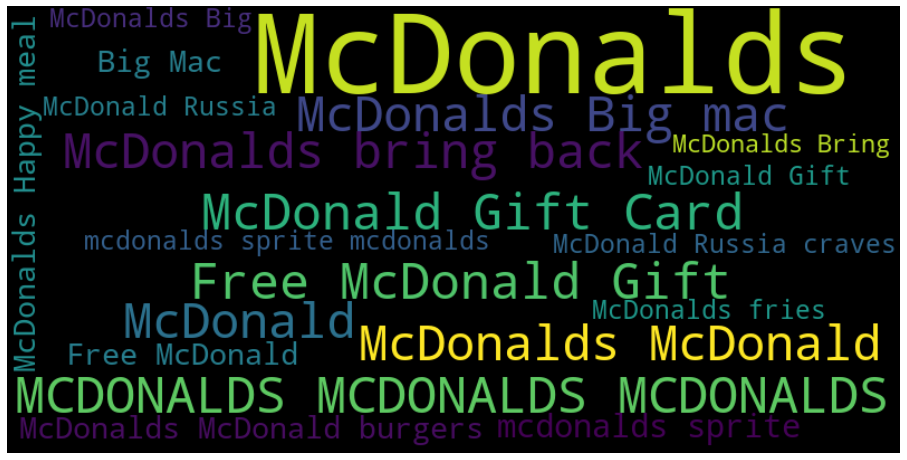

In [22]:
wordcloud = WordCloud(max_font_size=100,width = 800, height = 400).generate_from_frequencies(keyword_wordcloud)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

We get some relevant keywords, but also some keywords that are totally irrelevant. Since it is not obvious how to adjust the different parameters using Yake's API, we will instead use the Python package.

#### 6. Extract keywords with YAKE

In [23]:
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.8
deduplication_algo = 'jaro'
windowSize = 1
numOfKeywords = 10

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, 
                                            dedupFunc=deduplication_algo, windowsSize=windowSize, 
                                            top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)

('McDonalds', 6.391729187024043e-06)
('Free McDonald Gift', 4.7302731015178615e-05)
('Big Mac', 0.00019117867539454367)
('eat mcdonalds', 0.00038239278619756734)
('Burger King', 0.0006157877767296924)
('Ronald McDonald', 0.000760837875978243)
('love McDonalds', 0.0007747880473767945)
('back', 0.0008699626954451492)
('food', 0.0008766336515141179)
('Joe', 0.00091245729275116)


#### 7. Build wordcloud

In [24]:
# for YAKE, the lower the score, the more relevant the keyword is
# we need to reverse the order because for wordcloud, the highest the score, the more relevant the keyword is

keyword_wordcloud = {}
for keyword in keywords:
    if keyword[1] < 0:
        keyword_wordcloud[keyword[0]] = 1 
    else:
        keyword_wordcloud[keyword[0]] = 1 - keyword[1]

In [25]:
keyword_wordcloud

{'McDonalds': 0.999993608270813,
 'Free McDonald Gift': 0.9999526972689848,
 'Big Mac': 0.9998088213246055,
 'eat mcdonalds': 0.9996176072138024,
 'Burger King': 0.9993842122232703,
 'Ronald McDonald': 0.9992391621240218,
 'love McDonalds': 0.9992252119526233,
 'back': 0.9991300373045549,
 'food': 0.9991233663484859,
 'Joe': 0.9990875427072489}

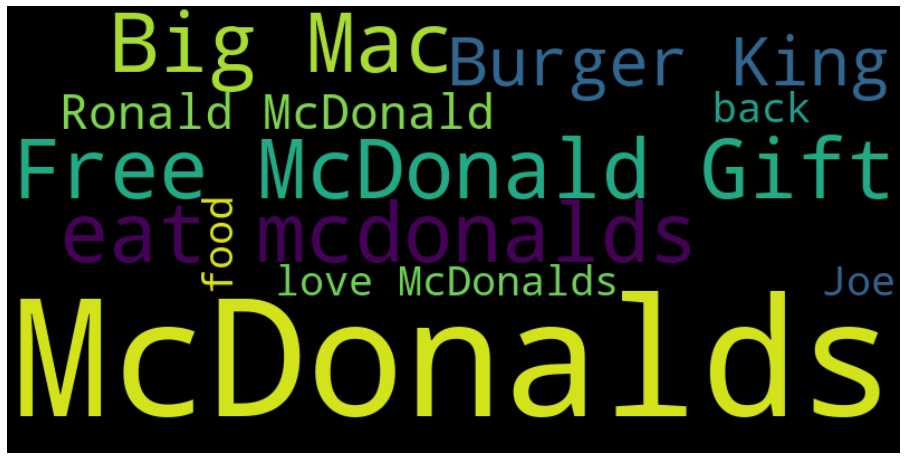

In [27]:
wordcloud = WordCloud(max_font_size=200,width = 800, height = 400).generate_from_frequencies(keyword_wordcloud)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

Once again, using different parameters we get a mix of relevant and irrelevant keywords. Since Yake's documentation, https://github.com/LIAAD/yake , is not clear on how we can improve these results, we will try an alternative approach.